In [35]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
epochs = mne.read_epochs("/Users/valery/PycharmProjects/Neuromatch_2022_EcoG_movements/data/subj_03_day_3_r_epo.fif")

Reading /Users/valery/PycharmProjects/Neuromatch_2022_EcoG_movements/data/subj_03_day_3_r_epo.fif ...
    Found the data of interest:
        t =   -5500.00 ...    5500.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Adding metadata with 21 columns
198 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


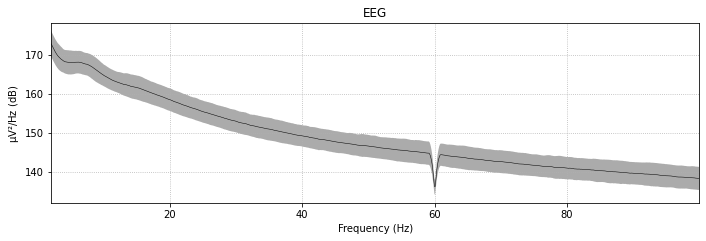

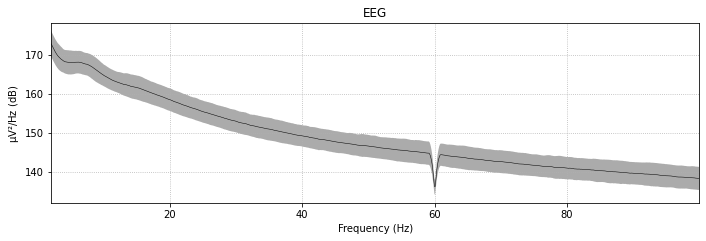

In [3]:
epochs.plot_psd(fmin=2., fmax=100., average=True, spatial_colors=False)

In [4]:
epochs.info

<Info | 11 non-empty values
 bads: 1 items (EEG0)
 ch_names: EEG0, EEG1, EEG2, EEG3, EEG4, EEG5, EEG6, EEG7, EEG8, EEG9, ...
 chs: 80 EEG
 custom_ref_applied: False
 dig: 80 items (80 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 80
 projs: []
 sfreq: 500.0 Hz
>

In [5]:
epochs.get_data().shape

(198, 80, 5501)

Need more than one channel to make topography for eeg. Disabling interactivity.


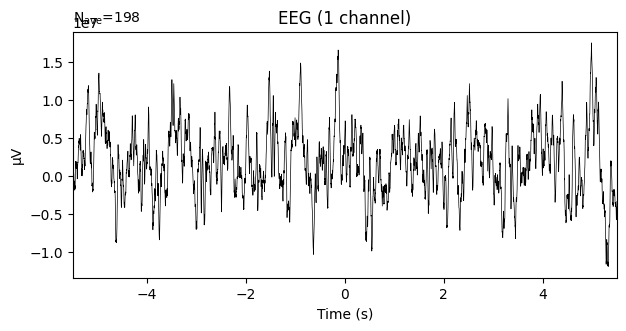

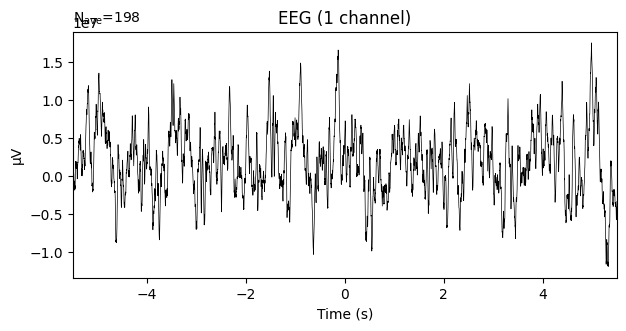

In [23]:
epochs.average().plot(picks=[5])

In [8]:
epochs.metadata

,day,time,event_timestamp,mvmt,vid_name,event_frame_idx,false_pos,reach_duration,reach_r,reach_a,...,other_reach_overlap,bimanual,other_lead_lag,patient_id,I_over_C_ratio,r_wrist_x,r_wrist_y,l_wrist_x,l_wrist_y,audio_ratio
0,3,349096,349096,r_wrist,cb46fd46_5_0269.avi,2687,1,18,129.255291,153.922111,...,0,0,NaN,cb46fd46,0.058799,"[159.2968201637, 159.3015785217, 161.610570669...","[260.5095117688, 259.8508704752, 259.686334729...","[363.4200232029, 363.6931707263, 363.693170726...","[269.3371145725, 269.275007844, 269.3371145725...",0.277828
1,3,357329,357329,r_wrist,cb46fd46_5_0269.avi,2934,1,30,157.093448,143.920066,...,0,0,NaN,cb46fd46,0.032168,"[272.0346722603, 272.0346722603, 272.317434787...","[164.272222966, 164.0334121138, 163.8919103295...","[366.0338521004, 365.9118920565, 366.033852100...","[269.7757759094, 269.7757759094, 269.775775909...",0.262430
2,3,11478566,11478566,r_wrist,cb46fd46_5_0362.avi,1857,0,38,114.913287,-67.822059,...,38,1,-18.0,cb46fd46,0.058791,"[232.765100956, 232.7682571411, 232.7682571411...","[305.3812096119, 305.3606238365, 305.334280967...","[397.4345211983, 397.4842261076, 397.484226107...","[219.0111321211, 219.1953587532, 219.195358753...",0.279697
3,3,11481000,11481000,r_wrist,cb46fd46_5_0362.avi,1930,0,66,129.378680,166.344976,...,66,1,-30.0,cb46fd46,0.814901,"[265.3709244728, 268.0208016299, 270.901381015...","[202.6973885298, 201.5245435238, 200.273917675...","[393.4012322426, 393.4012322426, 393.401232242...","[219.5476782024, 219.5476782024, 219.547678202...",0.275339
4,3,19725563,19725563,r_wrist,cb46fd46_5_0431.avi,850,0,38,62.666331,38.884473,...,7,1,26.0,cb46fd46,0.049987,"[205.2776894569, 205.2776894569, 205.277689456...","[116.6471176147, 116.6251044869, 116.587120294...","[291.0424515009, 291.0424515009, 291.042451500...","[163.8678843379, 163.8678843379, 163.867884337...",0.148695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,73412341,73412341,r_wrist,cb46fd46_7_0367.avi,2386,0,13,43.330872,-130.143624,...,12,1,2.0,cb46fd46,0.107886,"[184.6811180115, 184.6811180115, 184.640647411...","[202.4682883024, 202.5081958771, 202.508195877...","[340.9602084756, 340.9602084756, 340.960208475...","[234.9840437174, 234.9840437174, 234.964179158...",0.493998
196,3,73415941,73415941,r_wrist,cb46fd46_7_0367.avi,2494,0,31,82.450291,-97.639978,...,0,0,NaN,cb46fd46,0.002611,"[183.703119278, 183.7131268978, 183.7326180935...","[202.9964283705, 202.9475374222, 202.909341335...","[338.957100749, 338.939800024, 338.939800024, ...","[242.4824868441, 242.5029166937, 242.614224553...",0.492787
197,3,83585236,83585236,r_wrist,cb46fd46_7_0452.avi,1558,0,36,234.260583,-130.877526,...,0,0,NaN,cb46fd46,0.005729,"[292.9916315675, 292.9916315675, 292.991631567...","[254.8593919277, 254.8593919277, 254.859391927...","[469.9281426668, 469.9281426668, 469.929567456...","[271.9928011894, 272.1515250206, 272.151525020...",0.489058
198,3,83961273,83961273,r_wrist,cb46fd46_7_0455.avi,2030,0,80,94.847091,25.296243,...,52,1,19.0,cb46fd46,0.000000,"[228.1119900048, 228.2029083967, 228.211759224...","[204.664827168, 204.664827168, 204.664827168, ...","[525.1745374203, 525.1745374203, 525.174537420...","[180.334354043, 180.334354043, 180.334354043, ...",0.417448


In [12]:
len(epochs.metadata.l_wrist_x[0])

150

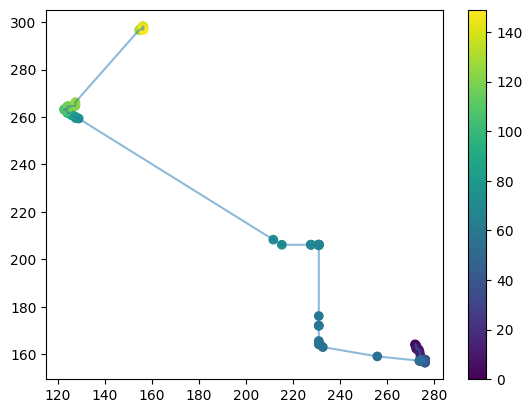

In [51]:
event = 1
plt.plot(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event], '-',
         alpha = 0.5)
plt.scatter(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event],
         c=np.arange(len(epochs.metadata.r_wrist_x[event])))
plt.colorbar()
plt.show()

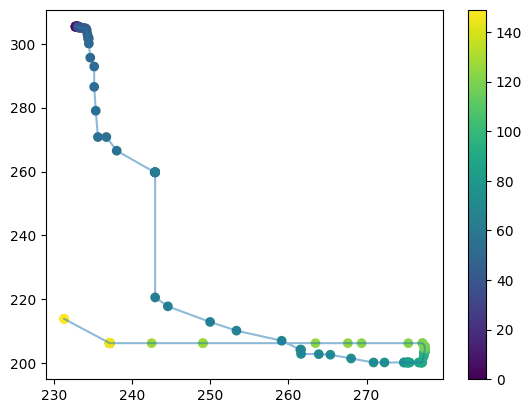

In [52]:
event = 2
plt.plot(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event], '-',
         alpha = 0.5)
plt.scatter(epochs.metadata.r_wrist_x[event], epochs.metadata.r_wrist_y[event],
         c=np.arange(len(epochs.metadata.r_wrist_x[event])))
plt.colorbar()
plt.show()

In [25]:
freqs = np.logspace(*np.log10([4, 150]), num=120)
average_tfr = mne.time_frequency.tfr_morlet(
    epochs, freqs, n_cycles = freqs / 4., use_fft=False, return_itc=False, verbose=False,
    average=True)

Applying baseline correction (mode: logratio)


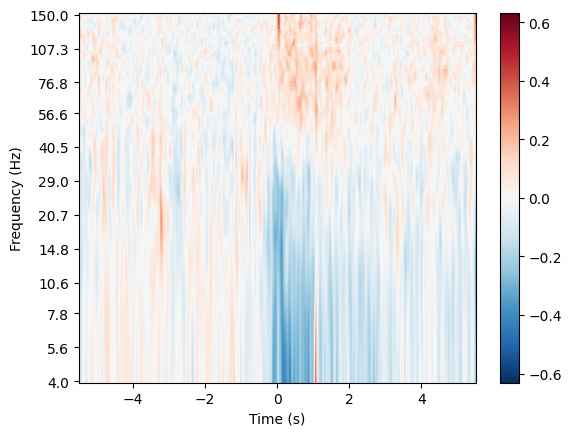

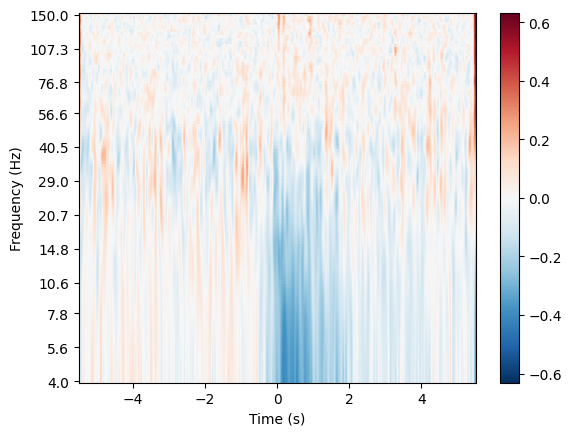

[<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 2 Axes>]

In [34]:
average_tfr.plot(picks=[56, 57], baseline=(-5, 0), mode='logratio')

Applying baseline correction (mode: logratio)


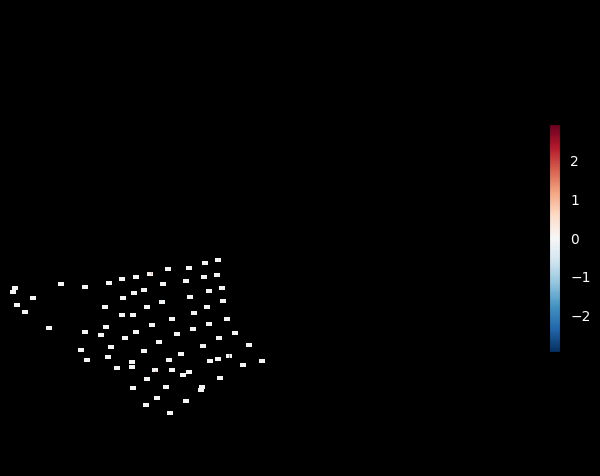

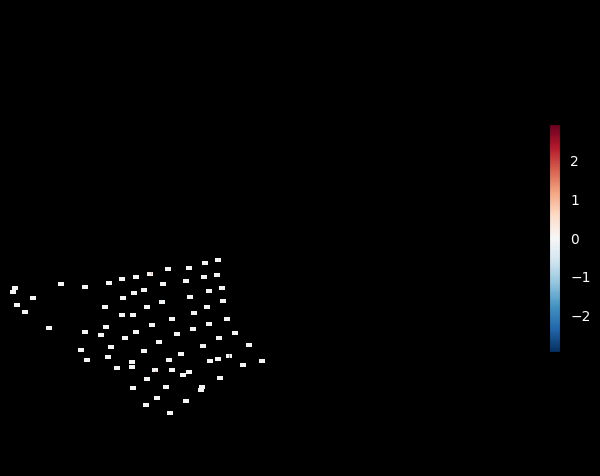

In [27]:
average_tfr.plot(baseline=(-5, 0), mode='logratio')

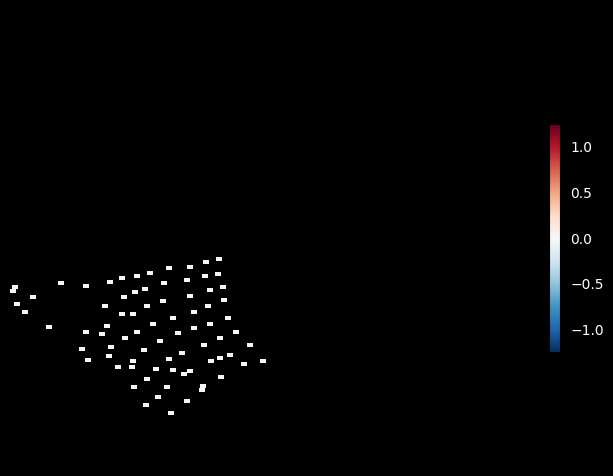

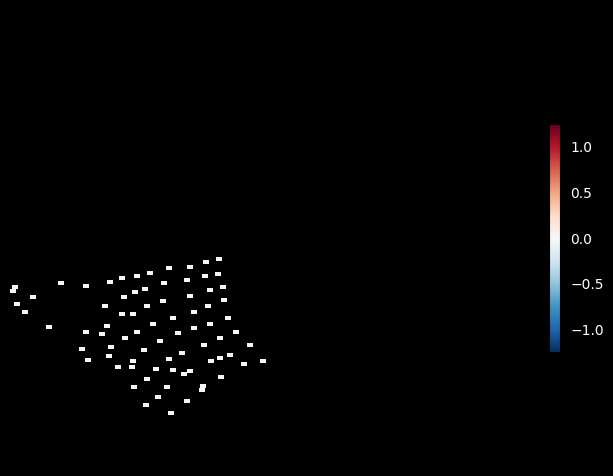

In [14]:
epochs.plot_topo_image()

In [11]:
epochs.info

<Info | 11 non-empty values
 bads: 1 items (EEG0)
 ch_names: EEG0, EEG1, EEG2, EEG3, EEG4, EEG5, EEG6, EEG7, EEG8, EEG9, ...
 chs: 80 EEG
 custom_ref_applied: False
 dig: 80 items (80 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 80
 projs: []
 sfreq: 500.0 Hz
>